## Getting Started

In [93]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('pune_house_data.csv') # Reading CSV file
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


## Exploratory Analysis

In [8]:
# Exploring the data
print("Total number of rows:", df.shape[0])
print("\nDropping the null values\n")
df = df.dropna()
print("Total number of rows after dropping null values:", df.shape[0])

Total number of rows: 7496

Dropping the null values

Total number of rows after dropping null values: 7496


In [9]:
# Selecting the required features for feature selection, and ignoring the rest
df_short = df.loc[:, ['total_sqft', 'price']]
df_short

,total_sqft,price
0,1056,39.07
1,2600,120.00
3,1521,95.00
5,1170,38.00
11,2785,295.00
...,...,...
13313,1345,57.00
13314,1715,112.00
13315,3453,231.00
13317,1141,60.00


In [53]:
df_short['total_sqft'][0]

'1056'

In [10]:
# Checking the data types of the features.
# Since we are Simple Linear regression, all our values should be numeric, not string.

print(df_short.total_sqft.dtype)
print(df_short.price.dtype)

(df_short.total_sqft[0], df_short.price[0])

object
float64


('1056', 39.07)

In [12]:
# Changing the data type of the features
# NOTE THIS WILL THROW AN ERROR IF THERE IS ANY NON-NUMERIC VALUE IN THE COLUMN.
# Let's try to transform the data type of the features with a custom function

try:
    df_short.total_sqft = df_short.total_sqft.astype(float)

except Exception as e:
    print("Error:", e)

Error: could not convert string to float: '2100 - 2850'


In [60]:
# print('2000 - 3000')
# print(float('2000 - 3000'))

In [13]:
val = '2100 - 2850'

val.split('-')

for number in val.split('-'):
    print(
        float(number)
        )

2100.0
2850.0


In [15]:
def change_to_float(x):
    try:
        return float(x) # Try to convert value to float
    except: # If the conversion fails, then it's probably a range of values (e.g. 1000-2000)
        try: 
            if '-' in x: # If the value is a range, then take the average of the range
                values = (x.split('-'))
                values = [float(i) for i in values] # Convert the values to float
                average = sum(values)/len(values) # Calculate the average

                return average
        except:
            print(x) # If the conversion fails, then print the value for debugging
            return np.nan # return nan when conversion fails.
    
df_short.total_sqft = df_short.total_sqft.apply(change_to_float) # Apply the function to the total_sqft column
df_short.total_sqft.head() # Preview the head

0     1056.0
1     2600.0
3     1521.0
5     1170.0
11    2785.0
Name: total_sqft, dtype: float64

In [17]:
df_short.isna().value_counts() # Checking the number of NaN values after type conversion.

total_sqft  price
False       False    7481
True        False      15
dtype: int64

In [18]:
# After type conversion, ~15 values were converted to NaN. Let's drop them.
df_short = df_short.dropna()

# Visualizing the Data

<Axes: xlabel='total_sqft', ylabel='price'>

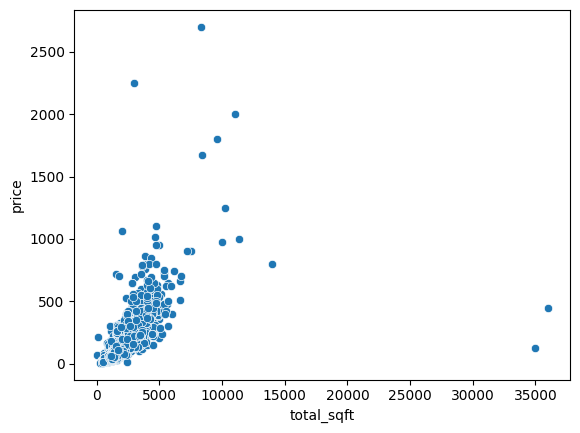

In [19]:
sns.scatterplot(x='total_sqft', y='price', data=df_short) # Visualizing the data

# Model Training

### Splitting dataset into training and testing data

In [21]:
# Defining our X and y variables for simple linear regression
# Here X is the size of the house in BHK (independent variable) 
# and y is the price of the house (dependent variable that we want to predict)

X = df_short['total_sqft'].values.reshape(-1, 1)
y = df_short['price'].values.reshape(-1, 1)


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the Model

In [22]:

model = LinearRegression() #Loading the sklearn linear regression model

model.fit(X_train, y_train) # Training the model

y_pred = model.predict(X_test) # Using our test data to predit house prices

### Visualizing the outputs

<Axes: >

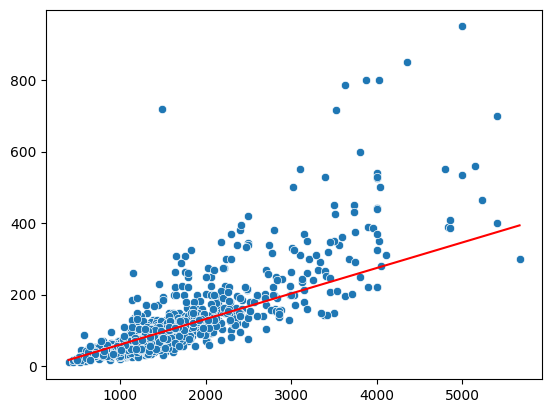

In [23]:
sns.scatterplot(x = X_test.reshape(-1), y=y_test.reshape(-1))
sns.lineplot(x = X_test.reshape(-1), y=y_pred.reshape(-1), color='red')

### Evaluating the Model

y = mx + c

In [25]:
print("Coefficients:", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction

Coefficients: [[0.07146136]]
Mean squared error: 3605.45
Coefficient of determination: 0.60


Notice here how we only have a 0.6 correlation between the predicted and actual values. This is not a good model.
Let's try to improve it.

## OPTIMIZATION

### Outlier Removal

In [26]:
print(df_short.shape)
df_short.describe()

(7481, 2)


,total_sqft,price
count,7481.000000,7481.000000
mean,1507.606940,96.773959
std,935.059206,105.393700
min,11.000000,8.000000
25%,1115.000000,49.500000
50%,1310.000000,69.610000
75%,1656.000000,105.000000
max,36000.000000,2700.000000


In [27]:
# Defining a new dataframe with outliers removed
df_no_outliers = df_short[
    df_short.total_sqft.between(
        df_short.total_sqft.quantile(0.05), 
        df_short.total_sqft.quantile(0.95)
        )

    & df_short.price.between(
        df_short.price.quantile(0.05),
        df_short.price.quantile(0.95)
        )
    ]

print(df_no_outliers.shape)
df_no_outliers.describe()

(6444, 2)


,total_sqft,price
count,6444.000000,6444.000000
mean,1406.320186,80.796158
std,375.684400,40.262556
min,745.000000,31.890000
25%,1145.000000,52.000000
50%,1312.250000,70.000000
75%,1600.000000,98.000000
max,2900.000000,252.000000


<Axes: xlabel='total_sqft', ylabel='price'>

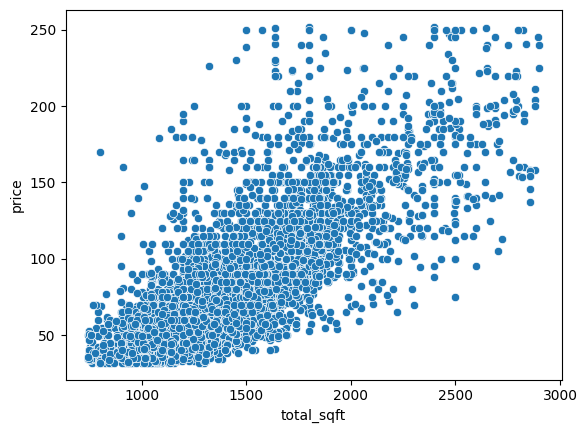

In [29]:
sns.scatterplot(x='total_sqft', y='price', data=df_no_outliers)

### Retraining the model

In [30]:
X = df_no_outliers['total_sqft'].values.reshape(-1, 1)
y = df_no_outliers['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
model = LinearRegression() #Loading the sklearn linear regression model

model.fit(X_train, y_train) # Training the model

y_pred = model.predict(X_test) # Using our test data to predit house prices

<Axes: >

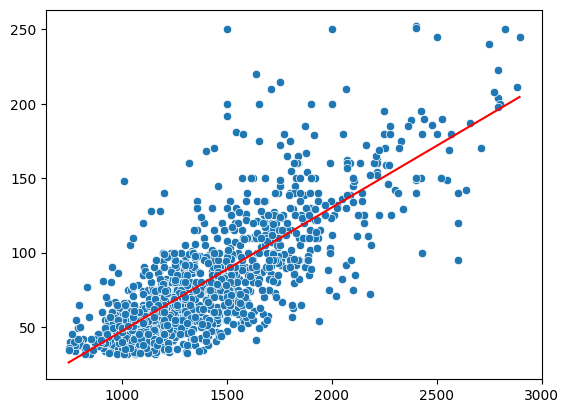

In [32]:
### Visualizing the outputs
sns.scatterplot(x = X_test.reshape(-1), y=y_test.reshape(-1))
sns.lineplot(x = X_test.reshape(-1), y=y_pred.reshape(-1), color='red')

In [33]:
### Evaluating the Model
print("Coefficients:", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction

Coefficients: [[0.08304533]]
Mean squared error: 611.91
Coefficient of determination: 0.61
